# Will's Workspace
## Just will and his coffee
### ...and some equations and stuff

In [6]:
%matplotlib inline

from math import *
from modsim import *

In [7]:
#arbitrary
#r-value
init_temp = 37
fin_temp = 35
env_temp = 0
dt = 10

def find_r(T_i, T_f, T_e, ):
    coef = log((T_f - T_e) / (T_i - T_e))
    return -coef / dt

r = find_r(init_temp, fin_temp, env_temp)
print(r)

0.00555698511548


In [8]:
#specific heat of person
c_lbs = 3500
def add_weight(lbs):
    return c_lbs * lbs

c_avg = add_weight(62)

In [9]:
#arbitrary
#heat produced by an individual
mu = .002

In [10]:
#make system function
def make_system(T_env=0, dt=10, lbs=62, mu=.002):
    T_i = 37
    r = .00556
    c_lbs = 3500
    
    c = c_lbs * lbs
    
    system = System(T_env=T_env, T_i=T_i, 
                    r=r, mu=mu, c=c)
    return system

In [11]:
#ADD THESE
def make_system(T_env=0, t_end=10, lbs=62, mu=.002, x=0):
    T_i = 37
    r = .00556
    c_lbs = 3500
    init = State(T=T_i)
    c = c_lbs * lbs
    
    system = System(init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end)
    return system

def find_r(T_i, T_f, T_env, ):
    coef = log((T_f - T_env) / (T_i - T_env))
    return -coef / dt


In [70]:
def make_system(T_env=0, t_end=10, lbs=62, mu=.002, x=1,r =.0556, dt=1):
    T_i = 37                                            #initial temp
    c_lbs = 3500                                              
    init = State(temp=T_i)
    c = c_lbs * lbs
    
    system = System(init=init, T_env=T_env, 
                    r=r, mu=mu, c=c, x=x,
                    t0=0, t_end=t_end, dt=dt, T_i=T_i)
    return system

def update(state, dt, system): #updates the temperature using the function we developed
    unpack(system)
    T = state.temp
    
    T += -r * (T - T_env)*dt + mu * x #T is the temp of the person in the center
    #print(T)
    return State(temp=T)


def run_sim(system, update_func):
    
    frame = TimeFrame(columns=system.init.index)
    frame.loc[system.t0] = system.init
    ts = linrange(system.t0, system.t_end, system.dt)
    
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t], dt, system)
        #frame.loc[t+1] = update(system)
    
    system.results = frame
    
def plot_sim(system):               #simple plot function, needs to be updated to make it look prettier
    plot(system.results, style= 'b-', label= 'temp')
    decorate(xlabel='Time (min)',
             ylabel='Body Temperature (Celsius)',
             title='Body Temp over Time')
    savefig('ind_body_temp.pdf')

Saving figure to file ind_body_temp.pdf


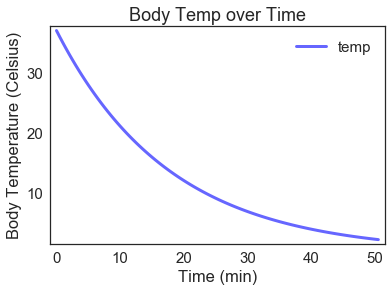

In [74]:
system = make_system(t_end=50, x=2, dt=.5)
run_sim(system, update)
plot_sim(system)

In [55]:
#help(linrange)